# Introduction

* Binary Classification - When we have 2 classes to define, e.g. is it a cat or a dog
* Multiclass Classification - When we have multiple classes to define, e.g. pizza, hot-dog, hamburger, snadwich, etc...
* Multilabel Classification - Basicaly it's when we have a a question: "What labels does this e.g. article should have" So we don't define by ourselves options, if we have e.g. 10000 articles we might don't know how to clasify then so we use deep learning to that. Then model can attach to one article multiple labels, and that's why it's called multilable classification.

## Usual Binary Classification Model

* Input layer shape - Same as number of features, e.g. 3 for age, sex, height.
* Hidden layers - min. 1 max unlimited
* Neurons per hidden layer - from 10 to 100
* Output layer shape - 1 (one class or another)
* Hidden activation - Usualy ReLu (Rectified Linear Unit)
* Output Activation - Sigmoid
* Loss function - Binary Crossentropy (tf.keras.losses.BinaryCrossentropy)
* Optimizers - SGD, ADAM



```
import tensorflow as tf
import pandas as pd

model = tf.keras.model.Sequential([
    tf.keras.layers.input(shape = (243, 243, 3)), # 243x243 pixels and 3 colors Red Green Blue
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metric = ['mae']
)

model.fit(
    X_train,
    y_train,
    epochs = 500
)

model.evaluate(X_test, y_test)
```



## Usual Multiclass Classification Model

* Input layer shape - Same as number of features, e.g. 3 for age, sex, height.
* Hidden layers - min. 1 max unlimited
* Neurons per hidden layer - from 10 to 100
* Output layer shape - 1 (one class or another)
* Hidden activation - Usualy ReLu (Rectified Linear Unit)
* Output Activation - Softmax
* Loss function - Categorical Crossentropy (tf.keras.losses.CategoricalCrossentropy)
* Optimizers - SGD, ADAM



```
import tensorflow as tf

tf.random.set_seed(42)

model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # We need to use flatten to shape all pixels in one string with values of gray
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') # We have 10 classes so we need to add 10 nodes on outer layer, also we need softmax activation function on output layer
])

model_norm.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), # So here we need to use SparseCategoricalCrossentropy because we have 10 integers as labels, and for CategoricalCrossentropy you need labels to be one-hot encoded, to use integers we need to add Sparse which is explained in documentation of this tensorflow loss function
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_norm.fit(
    train_data_norm,
    train_labels,
    epochs = 10,
    validation_data = (test_data_norm, 
                       test_labels) # we can use our test data as validation data
)
```



## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

## Visualize

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], 'Lables':y})
circles

,X0,X1,Lables
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


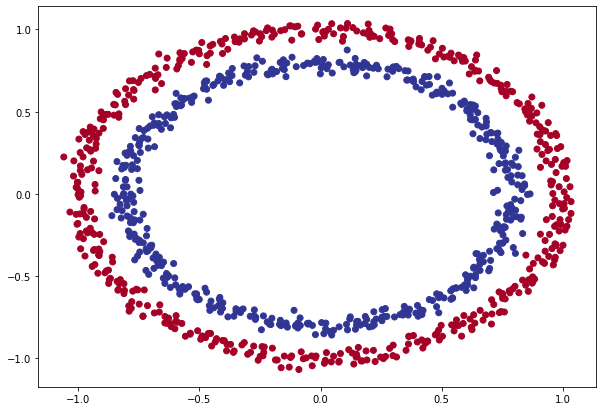

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(circles['X0'], circles['X1'], c=y, cmap = plt.cm.RdYlBu)

### Tensorflow playground

http://playground.tensorflow.org

## Input and Output shape

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# sample
len(X), len(y)

(1000, 1000)

In [ ]:
# view the first example of input and output
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

## Modelling

Epoch 1/20
32/32 [==============================] - 3s 11ms/step - loss: 0.6959 - accuracy: 0.4850
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5170
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 0.6888 - accuracy: 0.5220
Epoch 4/20
32/32 [==============================] - 0s 8ms/step - loss: 0.6861 - accuracy: 0.5670
Epoch 5/20
32/32 [==============================] - 1s 17ms/step - loss: 0.6823 - accuracy: 0.5660
Epoch 6/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6769 - accuracy: 0.5580
Epoch 7/20
32/32 [==============================] - 0s 14ms/step - loss: 0.6696 - accuracy: 0.6190
Epoch 8/20
32/32 [==============================] - 0s 13ms/step - loss: 0.6563 - accuracy: 0.6400
Epoch 9/20
32/32 [==============================] - 0s 10ms/step - loss: 0.6437 - accuracy: 0.6670
Epoch 10/20
32/32 [==============================] - 0s 8ms/step - loss: 0.6172 - accuracy: 0.7250
Epoch 11/20
32

<Axes: >

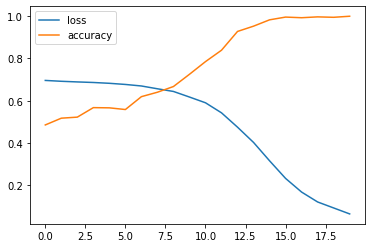

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model.fit(
    X,
    y,
    epochs = 20
)

pd.DataFrame(history.history).plot()

## Desision Boundaries

In [ ]:
def plot_decision_boundary(model, X, y):
    import numpy as np
    '''
    Plots the decision boundary created by a model predictiing on X.
    '''

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make preditction on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
      print('doing multiclass classification')
      # We have to reshape our prediction to get the ready
      y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
      print('doing binary classification')
      y_pred = np.round(y_pred).reshape(xx.shape)

    
    # Plot the decision boundary
    plt.figure(figsize=(10,7))
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), yy.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 3s 8ms/step
doing binary classification


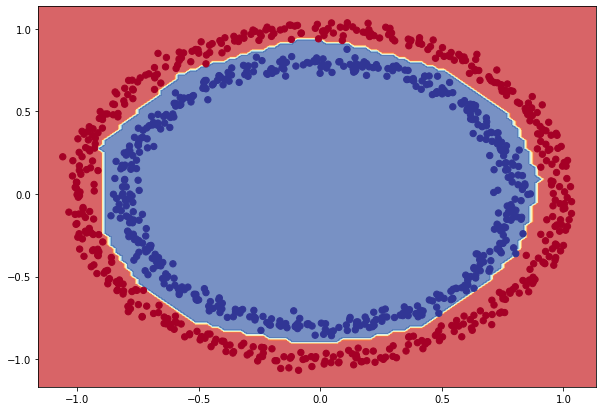

In [ ]:
plot_decision_boundary(model, X, y)

As can we see this data is non-linear.

## Linear example

Epoch 1/20
32/32 [==============================] - 1s 6ms/step - loss: 4.3182 - accuracy: 0.4130
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 4.2337 - accuracy: 0.4260
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 4.1374 - accuracy: 0.4370
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 4.0901 - accuracy: 0.4420
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 4.0859 - accuracy: 0.4430
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 4.0828 - accuracy: 0.4460
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 4.0803 - accuracy: 0.4470
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 4.0602 - accuracy: 0.4460
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 4.0410 - accuracy: 0.4510
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 3.9905 - accuracy: 0.4500
Epoch 11/20
32/32 [

<Axes: >

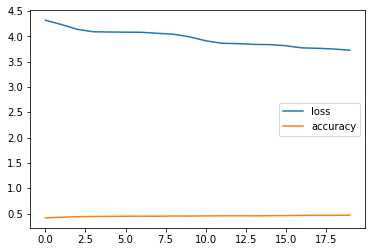

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'linear'),
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model.fit(
    X,
    y,
    epochs = 20
)

pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 4ms/step
doing binary classification


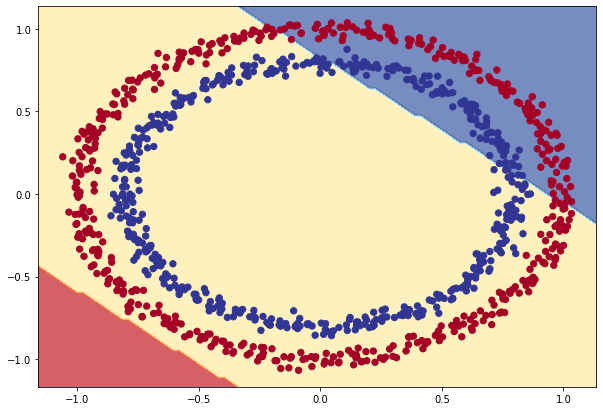

In [ ]:
plot_decision_boundary(model, X, y)

Since our data is non-linear we get 50% of good answers. That's because our model splits the dataset into two sets but not with eliptic function as it suppose to but with linear one, so just a straight line. Thats why we have around 50% of correct answers.

Toy tensor

In [ ]:
A = tf.range(-10., 10.)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Visualize

## Linear function

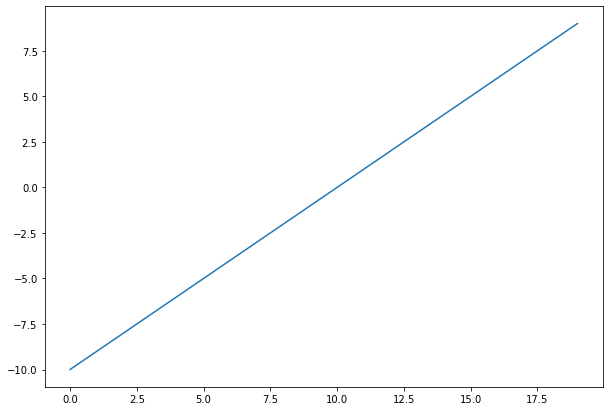

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(A)

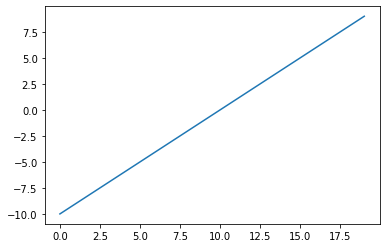

In [ ]:
plt.plot(tf.keras.activations.linear(A))

## Sigmoid function

Sigmoid function is *sigmoid(x) = 1 / (1 + exp(-x))*

In [ ]:
import numpy as np
# def sigmoid(A):
#   sigmoid = []
#   for x in A:
#     sigmoid.append(1 / (1 + np.exp(-x)))
#   plt.plot(sigmoid)

def sigmoid(A):
  plt.plot(1 / (1 + np.exp(-A)))

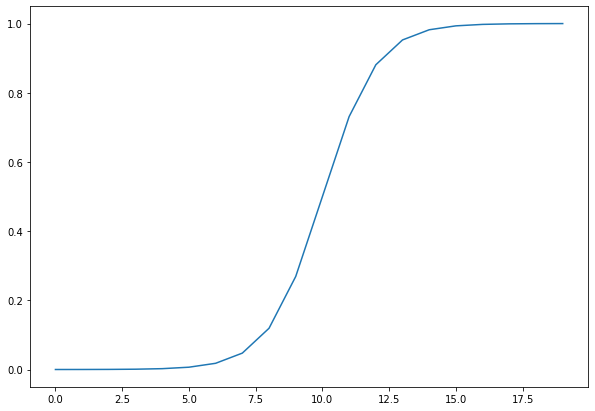

In [ ]:
plt.figure(figsize=(10,7))
sigmoid(A)

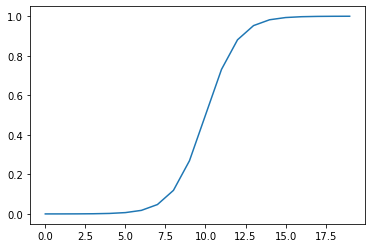

In [ ]:
plt.plot(tf.keras.activations.sigmoid(A))

## ReLU function

ReLU function is *ReLU(x) = max(0, x)*

In [ ]:
A = tf.range(-10, 10)

In [ ]:
def ReLU(A):
  plt.plot(tf.maximum(0,A))

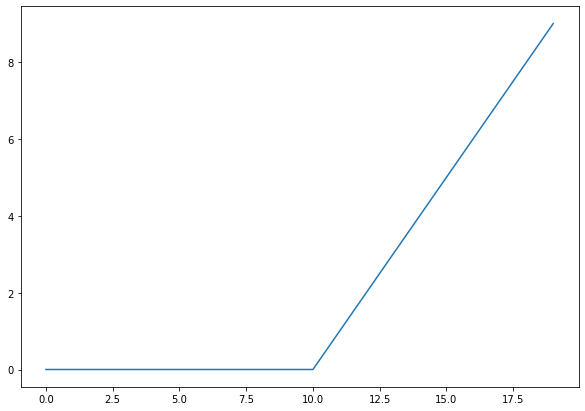

In [ ]:
plt.figure(figsize=(10,7))
ReLU(A)

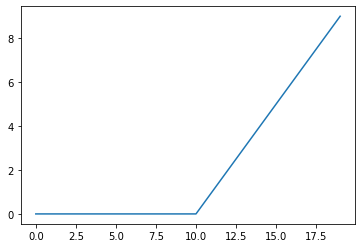

In [ ]:
plt.plot(tf.keras.activations.relu(A))

## Cheat sheet

https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Proper testing

We didn't divide model into train and test set. Let's do it now.

In [ ]:
len(X)

1000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Epoch 1/20
25/25 [==============================] - 3s 8ms/step - loss: 0.6940 - accuracy: 0.4825
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5038
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6888 - accuracy: 0.5362
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6856 - accuracy: 0.5412
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.5437
Epoch 6/20
25/25 [==============================] - 0s 13ms/step - loss: 0.6764 - accuracy: 0.5487
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6691 - accuracy: 0.5800
Epoch 8/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6588 - accuracy: 0.6062
Epoch 9/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6478 - accuracy: 0.6750
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6282 - accuracy: 0.6850
Epoch 11/20
25/

<Axes: >

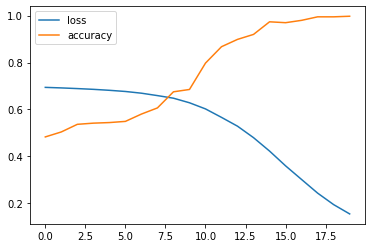

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs = 20
)

pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9750


[0.17996111512184143, 0.9750000238418579]

So as we can see we have acc of 92% which is lower when testing on training data

### Plotting training and testing decision boundaries

Here are decision boundaries for training set

313/313 [==============================] - 1s 1ms/step
doing binary classification


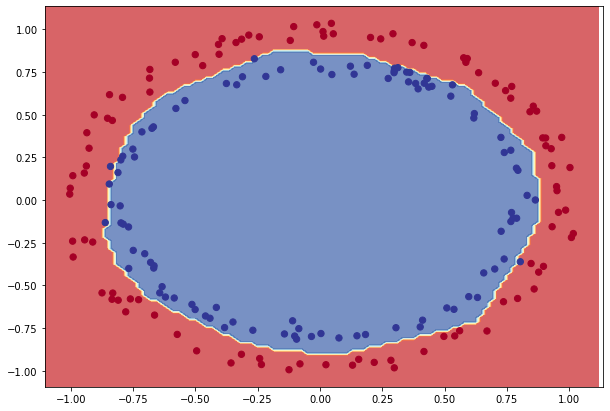

In [ ]:
import matplotlib.pyplot as plt
plot_decision_boundary(model, X_test, y_test)

Here is the decision boundary for testing set

313/313 [==============================] - 0s 1ms/step
doing binary classification


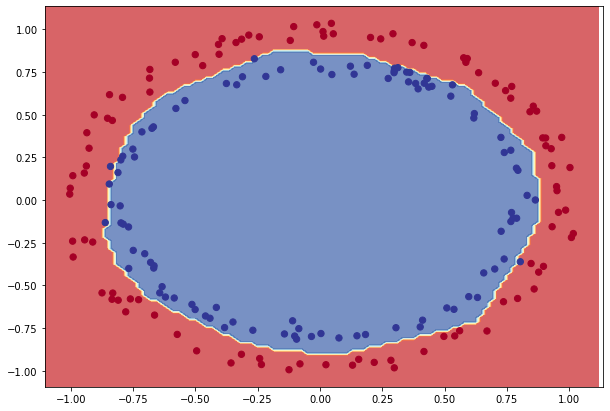

In [ ]:
plot_decision_boundary(model, X_test, y_test)

## Adjusting efficient learning_rate

So as a default tensorflow takes learning_rate of 0.001. That means each weight in each epoch can be changed by 0.001. Let's try that.

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6978 - accuracy: 0.4938
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4650
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5088
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5113
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5138
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5225
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5288
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5562
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5387
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5838
Epoch 11/20
25/25 [

<Axes: >

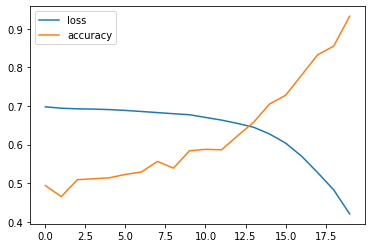

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs = 20
)

pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.8450


[0.4596380591392517, 0.8450000286102295]

As we can see the loss function wasn't improving significantly up for almost half of the epochs. That could mean that our learning_rate is to small so the weights are changing too slowly. Let's set higher learning_rate of 0.01

Epoch 1/20
25/25 [==============================] - 1s 5ms/step - loss: 0.6865 - accuracy: 0.5537
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.6413
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.7100
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3404 - accuracy: 0.9038
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3009 - accuracy: 0.8725
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 0.9575
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9925
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0633 - accuracy: 0.9775
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9787
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0823 - accuracy: 0.9625
Epoch 11/20
25/25 [

<Axes: >

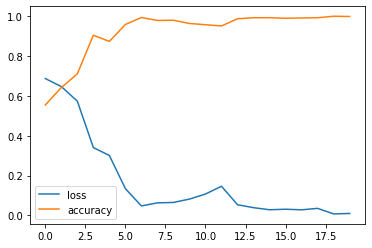

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs = 20
)

pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9950


[0.020980674773454666, 0.9950000047683716]

Awesome, firstly as we can see the loss function started decreasing almost immediately. BUT our evaluation is also significantly higher because it's 99% comparing to 95%. However what is also noticable is that, we don't need 20 epochs, we could stop afte ONLY 7. Let's try that.

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.6884 - accuracy: 0.5238
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.5925
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6725
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7738
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7538
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8400
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 0.9200
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9538
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9750
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9187


<Axes: >

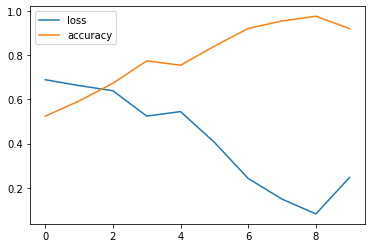

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs = 10
)

pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.8400


[0.4384102523326874, 0.8399999737739563]

We got 98% from testing set, which is a bit worse but still better than model with learning_rate of 0.001 and 20 epochs.

Now let's try even bigger learning_rate

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.7192 - accuracy: 0.5125
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5437
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5300
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4950
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4725
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4900
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.4550
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4875
Epoch 11/20
25/25 [

<Axes: >

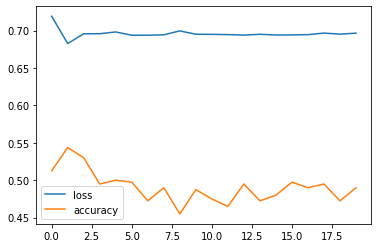

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs = 20
)

pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933832764625549, 0.5]

Here our learning rate is too big, we basically were skipping over the deepest place of loss function because of too big steps.

## Understanding training plot

model.fit returns hisotry object, history.history returns dict of training loss values, training metric values, and validation loss values and validation metric values (if set) history along each epoch.

In [ ]:
history.history

{'loss': [0.7191638946533203,
  0.6826883554458618,
  0.6957018971443176,
  0.6958089470863342,
  0.6981852650642395,
  0.6937711834907532,
  0.6938198804855347,
  0.6943319439888,
  0.6995851993560791,
  0.6951155066490173,
  0.69496750831604,
  0.6946485638618469,
  0.6939449906349182,
  0.6950643062591553,
  0.6940785050392151,
  0.6942242383956909,
  0.6945474147796631,
  0.6966545581817627,
  0.6952130198478699,
  0.696564793586731],
 'accuracy': [0.512499988079071,
  0.543749988079071,
  0.5299999713897705,
  0.4950000047683716,
  0.5,
  0.4975000023841858,
  0.4724999964237213,
  0.49000000953674316,
  0.45500001311302185,
  0.48750001192092896,
  0.4749999940395355,
  0.4650000035762787,
  0.4950000047683716,
  0.4724999964237213,
  0.47999998927116394,
  0.4975000023841858,
  0.49000000953674316,
  0.4950000047683716,
  0.4724999964237213,
  0.49000000953674316]}

convert into dataframe

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.719164,0.51250
1,0.682688,0.54375
2,0.695702,0.53000
3,0.695809,0.49500
4,0.698185,0.50000
5,0.693771,0.49750
6,0.693820,0.47250
7,0.694332,0.49000
8,0.699585,0.45500
9,0.695116,0.48750


plot

Text(0.5, 1.0, 'Model loss and metric curves')

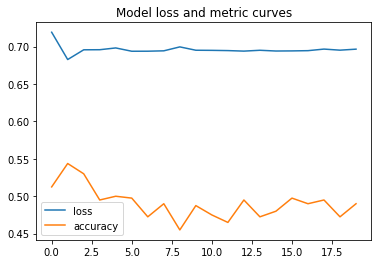

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model loss and metric curves')

## Learning_rate callback

**ideal learning_rate** - the one that causes that loss decreases the most during training. To achieve one we can do following steps:

* A learning rate callback - additional model functionality
* Another model - we can just keep tweaking the learning rate
* A modified loss curves plot

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    # losses = tf.keras.losses.BinaryCrossentropy(),
    loss = 'binary_crossentropy',
    # optimizer = tf.keras.optimizers.Adam(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)

# Create a learning_rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    callbacks = [lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6957 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4925 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<Axes: xlabel='epochs'>

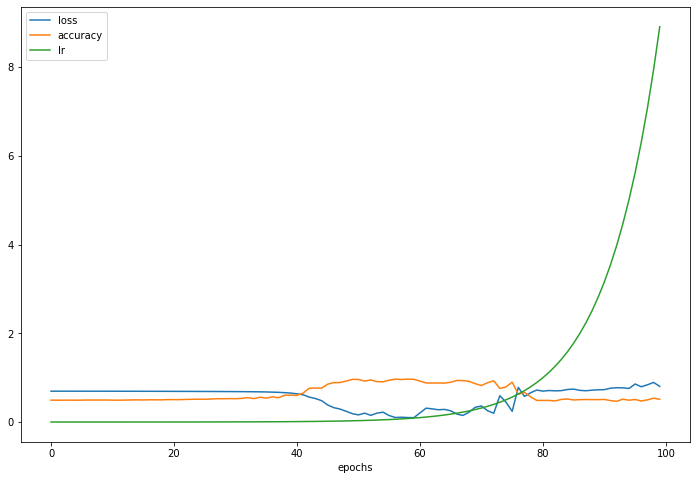

In [ ]:
pd.DataFrame(history.history).plot(figsize = (12, 8), xlabel = 'epochs')

### Plot learning_rate versus the loss

Text(0, 0.5, 'Loss')

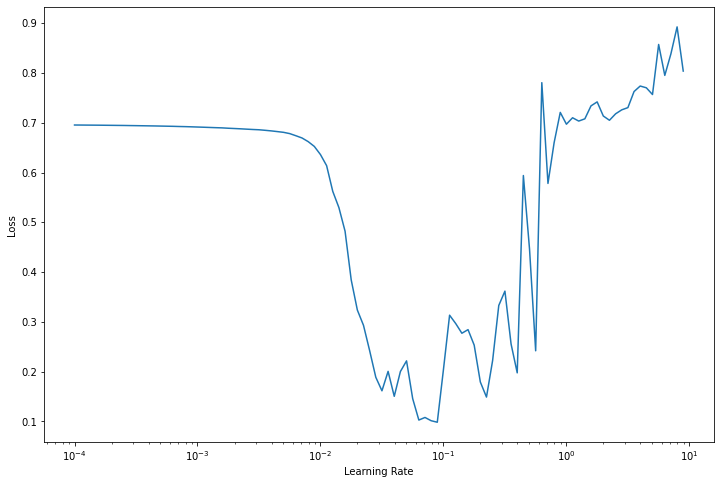

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20)) # replication of lr from model
plt.figure(figsize = (12,8))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

The best learning rate is somewhere between where the loss starts decreasing and the learning rate with lowest loss. So we can see that best learning rate is between 10^-2 and 10^-1 so 0.01 and 0.1. Also we can see a jump after 10**-2 lr above which high decrease of loss ends, and this is 10**-1.3 so around 0.025. We should test several learning rates from 10**-2 up to 10*-1.3 and use the best performing lr.

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    # losses = tf.keras.losses.BinaryCrossentropy(),
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    # optimizer = 'Adam',
    metrics = ['accuracy']
)

# Create a learning_rate callback

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(
    X_train,
    y_train,
    epochs = 50,
)

model.evaluate(X_test, y_test)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.5512
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5525
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5775
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.5950
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.5850
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.6712
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7125
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7412
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7975
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7800
Epoch 11/50
25/25 [

[0.12129709869623184, 0.9700000286102295]

<Axes: >

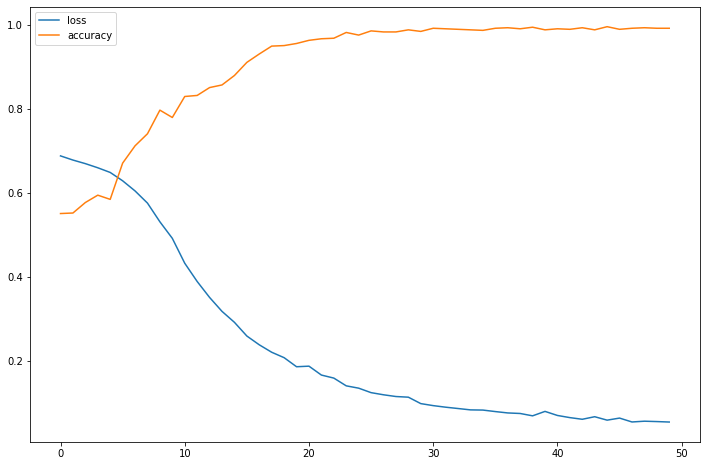

In [ ]:
pd.DataFrame(history.history).plot(figsize = (12,8))

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    # losses = tf.keras.losses.BinaryCrossentropy(),
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.025),
    # optimizer = 'Adam',
    metrics = ['accuracy']
)

# Create a learning_rate callback

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(
    X_train,
    y_train,
    epochs = 15,
)

model.evaluate(X_test, y_test)

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.6793 - accuracy: 0.5450
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.5962
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.6413
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7188
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7900
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.8138
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.9388
Epoch 8/15
25/25 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9850
Epoch 9/15
25/25 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.9962
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9900
Epoch 11/15
25/25 [

[0.06280642002820969, 0.9900000095367432]

<Axes: >

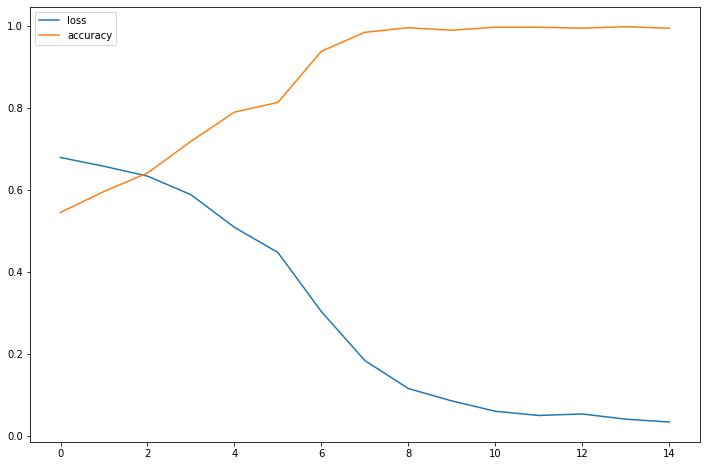

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,8))

As we can see learning rate od 10**-1.3 is performing better than 10**-2. We achieved 0.99 accuracy just after 8 epochs which is great. However evaluation is slightly better on 10**-2 and we should eventually pick this lr.

## Classification Rating Methods

### Accuracy



```
Accuracy

tp + tn / (tp + tn + fp + fn)

tf.keras.metrics.accuracy()
sklearn.metrics.accuracy_score()

Default metric for classification problems. Not best for imbalanced classes.
```



In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9900


In [ ]:
loss, accuracy

(0.06280642002820969, 0.9900000095367432)



```
Precission

tp / (tp + fp)

tf.keras.metrics.precission()
sklearn.metrics.precission_score()

Higher precission leads to less false positives
```





```
Recall

tp / (tp + fn)

tf.keras.metrics.recall()
sklearn.metrics.recall_score()

Higher recall leads to less false negatives


```



You can't have both precission and recall high. If you will increase precission it will reduce recall. It's calles Precission Recall Tradeoff



```
F1-score

2 * (precission + recall) / (precission + recall)

sklearn.metrics.f1_score()

Combination of precission and recall, usually a good overall metric for a classification model.
```



### Confusion Matrix



```
Confusion Matrix

sklearn.metrics.confusion_matrics()

It compares predictions to truth labels and gives back an efficiency of the model based on metrics. Can be hard to use with large number of classes.
```



In [ ]:
y_test[:5]

array([1, 0, 1, 0, 1])

We need to change a continuous form of y_pred into binary form

In [ ]:
y_pred = model.predict(X_test)

y_pred[:5], tf.round(y_pred[:5])

7/7 [==============================] - 0s 2ms/step


(array([[0.9963593 ],
        [0.00602607],
        [0.9934201 ],
        [0.00254351],
        [0.903663  ]], dtype=float32),
 <tf.Tensor: shape=(5, 1), dtype=float32, numpy=
 array([[1.],
        [0.],
        [1.],
        [0.],
        [1.]], dtype=float32)>)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred = tf.round(y_pred), y_true = y_test)

array([[99,  1],
       [ 1, 99]])

In [ ]:
def pretty_confusion_matrix(y_pred, y_true):

  import itertools
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix

  figsize = (10,10)

  cm = confusion_matrix(y_pred = tf.round(y_pred), y_true = y_true)

  cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # prettifying
  fig, ax = plt.subplots(figsize = figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # create a classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # set x-axis to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # adjust the label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)


  # set thresholds for different colors
  threshold = (cm.max() + cm.min()) / 2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i,j] > threshold else 'black',
            size = 15)

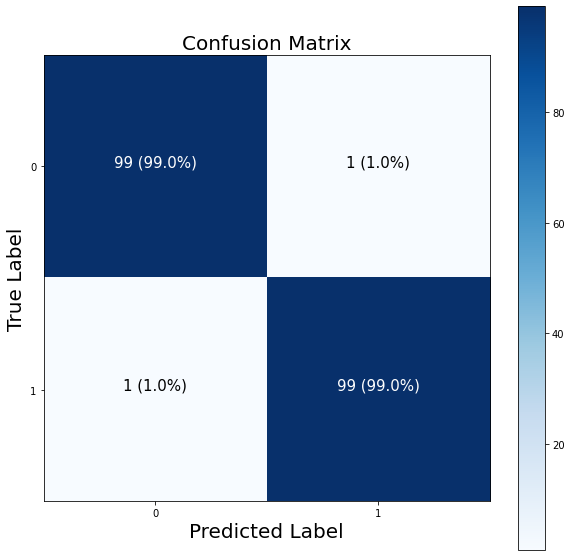

In [ ]:
pretty_confusion_matrix(y_pred, y_test)

# Multiclass Classification Complex Example

When you have more than two classes as an option is known as multiclass classification. 

## Import data fashion_mnist

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist # already sorted data into training and testing data

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_data[:2]

4422102/4422102 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

## Review data

In [3]:
train_labels[:2]

array([9, 0], dtype=uint8)

In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

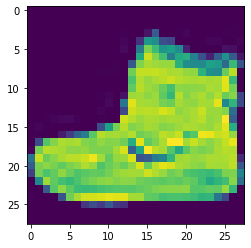

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [6]:
train_labels[0]

9

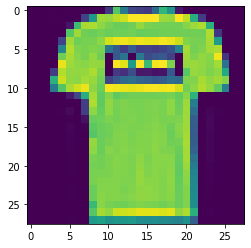

In [7]:
plt.imshow(train_data[1])

In [8]:
train_labels[1]

0

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

## Plot multiple random photos

Text(0.5, 1.0, 'T-shirt/top')

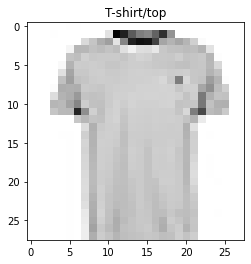

In [11]:
index_of_choice = 11332

plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

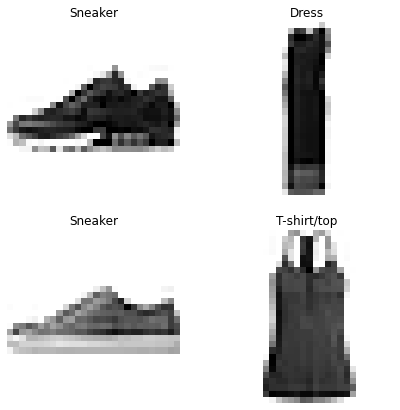

In [13]:
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot( 2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

### Setting up hyperparameters

Basically in comparison to binary classification in multiclass classification we need to tweak 4 things

* Input layer shape - Same as number of features, e.g. 3 for age, sex, height.
* Hidden layers - min. 1 max unlimited
* Neurons per hidden layer - from 10 to 100
* Output layer shape - 1 (one class or another)
* Hidden activation - Usualy ReLu (Rectified Linear Unit)
* Output Activation - Softmax
* Loss function - Categorical Crossentropy (tf.keras.losses.CategoricalCrossentropy)
* Optimizers - SGD, ADAM

#### Input Shape

Below we can see how many features we have for one picture. We have 28*28 pixels to define each picture.

In [14]:
train_data[0].shape

(28, 28)

In [15]:
28*28

784

That's why our input shape should have 28, 28

In [16]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

As we can see by using flatten layer we receive all pixels in one line

#### Output Shape

We have 10 classes so our output shape also needs to have 10 points

In [18]:
len(class_names)

10

#### Loss Function

Our loss function in multiclass classification got to be CategoricalCrossentropy instead of BinaryCrossentropy. WARNING!!!

* Use SparseCategoricalCrossnetropy if as a labels you have integers e.g. [1,2,3,4...]
* Use CategoricalCrossentropy if as a labels you have one_hot encoded labels so tf.one_hot(labels, depth = 10)

#### Output Layer Activation Function

In multiclass classification our output layer activation function needs to be softmax instead of sigmoid

### Simple Model

In [19]:
tf.cast(train_data, 'float64')
tf.cast(train_labels, 'float64')

<tf.Tensor: shape=(60000,), dtype=float64, numpy=array([9., 0., 0., ..., 3., 0., 5.])>

In [20]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # We need to use flatten to shape all pixels in one string with values of gray
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') # We have 10 classes so we need to add 10 nodes on outer layer, also we need softmax activation function on output layer
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), # So here we need to use SparseCategoricalCrossentropy because we have 10 integers as labels, and for CategoricalCrossentropy you need labels to be one-hot encoded, to use integers we need to add Sparse which is explained in documentation of this tensorflow loss function
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.fit(
    train_data,
    train_labels,
    epochs = 10,
    validation_data = (test_data, test_labels) # we can use our test data as validation data
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3584 - accuracy: 0.1105 - val_loss: 2.2209 - val_accuracy: 0.1352
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1299 - accuracy: 0.1631 - val_loss: 1.8489 - val_accuracy: 0.2369
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7054 - accuracy: 0.2662 - val_loss: 1.6244 - val_accuracy: 0.3076
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5909 - accuracy: 0.3149 - val_loss: 1.5638 - val_accuracy: 0.3209
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5405 - accuracy: 0.3314 - val_loss: 1.5232 - val_accuracy: 0.3465
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5131 - accuracy: 0.3413 - val_loss: 1.5019 - val_accuracy: 0.3366
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4934 - accuracy: 0.3505 - val_loss: 1.4822 - val_accuracy

#### Summary

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Enhanced Model

#### Normalisation

Our min. and max. values are

In [22]:
train_data.min(), train_data.max()

(0, 255)

Neural networsk prefer data to be scaled (or normalised), this means they like to have numbers in the tensors between 0 and 1.

##### Dividing by max

Should we normalize test data on max of train data?

It is generally recommended to normalize test data by the max value of the training set.

Normalization is a common pre-processing step in machine learning that scales the values of features to a similar range. This can help improve the performance of machine learning algorithms and make the optimization process more stable.

 When normalizing the data, the normalization parameters (such as the mean and standard deviation or the min and max values) **are typically calculated on the training set and then applied to the test set.** This ensures that the normalization is consistent between the training and test sets and that the test data is not used to inform the normalization process.

Therefore, to maintain consistency, it is recommended to normalize the test data by the max value of the training set, rather than the test set.



Should we normalise test and train labels?

No, you generally do not need to normalize the labels in a machine learning task.

Normalization is typically used to scale the input features in order to make them comparable and reduce the impact of the differences in their magnitudes on the learning algorithm. However, the labels are usually the output or target variable that you are trying to predict with the model, and they do not affect the learning process in the same way as the input features.

In some cases, you may have labels that are very large or very small, and normalizing them can help to make the learning algorithm more stable. For example, in some regression problems, it may be beneficial to scale the target variable to be in a similar range as the input features.

However, in most cases, normalizing the labels is not necessary or recommended. It is usually sufficient to preprocess the input features and leave the labels as they are.

In [23]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / train_data.max()

In [24]:
import tensorflow as tf

tf.random.set_seed(42)

model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # We need to use flatten to shape all pixels in one string with values of gray
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') # We have 10 classes so we need to add 10 nodes on outer layer, also we need softmax activation function on output layer
])

model_norm.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), # So here we need to use SparseCategoricalCrossentropy because we have 10 integers as labels, and for CategoricalCrossentropy you need labels to be one-hot encoded, to use integers we need to add Sparse which is explained in documentation of this tensorflow loss function
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_norm.fit(
    train_data_norm,
    train_labels,
    epochs = 10,
    validation_data = (test_data_norm, 
                       test_labels) # we can use our test data as validation data
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3460 - accuracy: 0.4561 - val_loss: 0.8398 - val_accuracy: 0.6919
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7441 - accuracy: 0.7254 - val_loss: 0.7103 - val_accuracy: 0.7421
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6640 - accuracy: 0.7546 - val_loss: 0.6674 - val_accuracy: 0.7530
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6271 - accuracy: 0.7666 - val_loss: 0.6262 - val_accuracy: 0.7662
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6048 - accuracy: 0.7715 - val_loss: 0.6171 - val_accuracy: 0.7731
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5901 - accuracy: 0.7758 - val_loss: 0.6048 - val_accuracy: 0.7765
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5799 - accuracy: 0.7799 - val_loss: 0.6040 - val_accuracy:

Immediately we were able to improve our validation accuracy from 10% up to 80% just by max normalising training and testing data.

##### Comparison of normalised and non-normalised data

Non-normalised data history plot

<Axes: title={'center': 'non-normalised data'}>

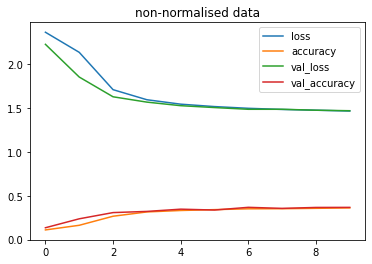

In [25]:
import pandas as pd

pd.DataFrame(model.history.history).plot(title='non-normalised data')

Normalised data history plot

<Axes: title={'center': 'normalised data'}>

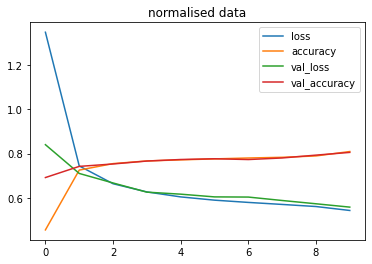

In [26]:
pd.DataFrame(model_norm.history.history).plot(title='normalised data')

Same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

#### Finding ideal learning-rate

In [27]:
import tensorflow as tf

tf.random.set_seed(42)

model_best_lr = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_best_lr.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_best_lr.fit(
      train_data_norm,
      train_labels,
      epochs =40,
      validation_data = (test_data_norm, test_labels),
      callbacks = [lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

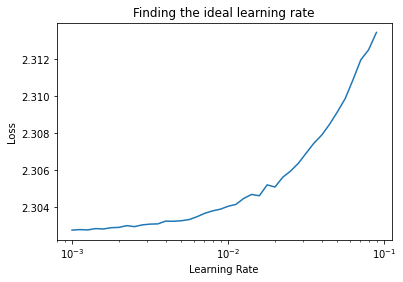

In [28]:
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, model_best_lr.history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

Ideal learning rate is where loss curve decreases sharply. You can also find the lowest point and back a little bit, thus 10^-3 is the best learning_rate.

In [29]:
# Set random seef
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile a model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

# Fit a model
model.fit(
    train_data_norm,
    train_labels,
    epochs = 20,
    validation_data = (test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0506 - accuracy: 0.5889 - val_loss: 0.7324 - val_accuracy: 0.7173
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6716 - accuracy: 0.7549 - val_loss: 0.6612 - val_accuracy: 0.7668
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6043 - accuracy: 0.7872 - val_loss: 0.6205 - val_accuracy: 0.7860
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5754 - accuracy: 0.7983 - val_loss: 0.5892 - val_accuracy: 0.7969
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5561 - accuracy: 0.8055 - val_loss: 0.5984 - val_accuracy: 0.7867
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5391 - accuracy: 0.8106 - val_loss: 0.5773 - val_accuracy: 0.8021
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5258 - accuracy: 0.8163 - val_loss: 0.5748 - val_accuracy:

<Axes: >

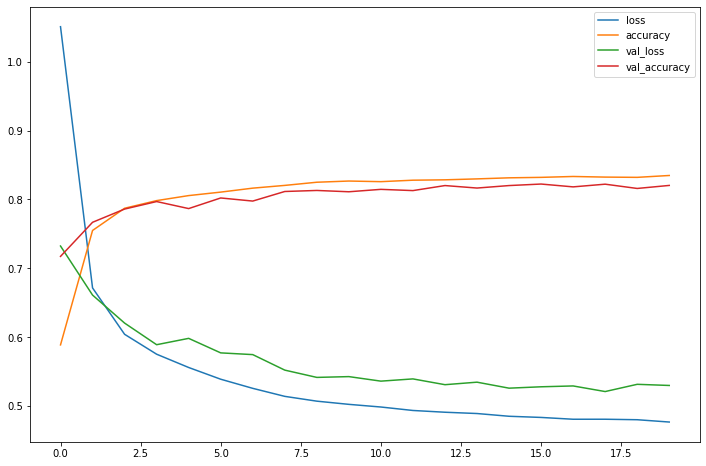

In [30]:
pd.DataFrame(model.history.history).plot(figsize = (12,8))

#### Evaluating Model

To evaluate our multi-class classificaition model we could:

* Evaluate it's performance using other classification metrics such as (confusion matrix)
* asses some of its predictions (through visualizations)
* Improve it's results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Top 2...

##### Multiclass Confusion Matrix

In [31]:
def pretty_confusion_matrix(y_pred, y_true, figsize, class_names, text_size):

  import itertools
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix

  figsize = figsize

  cm = confusion_matrix(y_pred = tf.round(y_pred), y_true = y_true)

  cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # prettifying
  fig, ax = plt.subplots(figsize = figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # create a classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = class_names,
        yticklabels = class_names)

  # set x-axis to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # set thresholds for different colors
  threshold = (cm.max() + cm.min()) / 2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i,j] > threshold else 'black',
            size = text_size)

In [32]:
y_pred = model.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [33]:
tf.round(y_pred)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

As we can see above our y_pred is one hot encoded instead of giving back integer value. To receive integer labels instead of one hot encoded data we will use argmax

In [34]:
y_pred_labels = tf.argmax(tf.round(y_pred), axis = 1)
y_pred_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([5, 2, 1, ..., 8, 1, 5])>

In [35]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [36]:
y_pred_labels.shape, test_labels.shape

(TensorShape([10000]), (10000,))

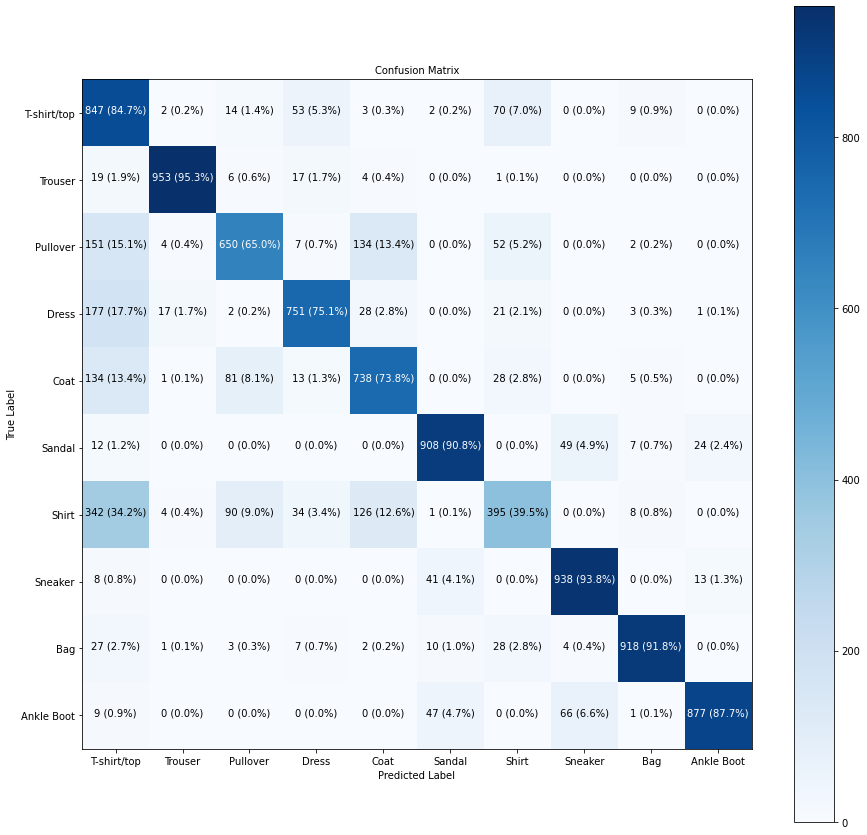

In [37]:
pretty_confusion_matrix(
                        y_pred = y_pred_labels, 
                        y_true = test_labels,
                        class_names = class_names,
                        figsize = (15, 15),
                        text_size = 10
                        )

So here on the left we can see true labels and on the bottom predicted labels. for example in top left corner we can see 86.6% of t-shirts got label t-shirt so it's true positive. in 3rd top left cell we can see that 0.8% of t-shirts was detected as pullovers.

##### Visualizing random model predictions

1. Plot a random image
2. Make a prediction on said image
3. Label the plot with the truth label & the predicted label

In [38]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.

  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}%. (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color = color) # set the color to green or red based on if prediction is right on wrong

1/1 [==============================] - 0s 28ms/step


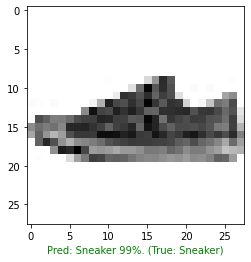

In [39]:
# Check out a random image as well as its predition
plot_random_image(model = model,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

##### What Weights and Biases is our model learning?

In [40]:
# Find the layers of our most recent model
model.layers

In [41]:
# Extract a particular layer
model.layers[1]

In [50]:
# Get the patterns of a layer in our network
weights, biases = model.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.26474676,  0.2734995 ,  0.318607  ,  0.62816334],
        [-0.6248122 ,  0.82758456, -0.31785354,  0.41625172],
        [ 0.47040597,  0.1799696 , -1.0747805 ,  0.5584524 ],
        ...,
        [ 0.19896214, -0.44352075, -0.3555187 , -0.17802218],
        [-0.41244236, -1.0010245 , -0.02404693,  0.4140764 ],
        [ 0.01080346, -0.12596257, -0.36980376,  0.21196353]],
       dtype=float32), (784, 4))

From shape of weights we can see that shape of weights 784 corresponds to input data shape which is 28x28. Furthermore we have 4 items in each list due to 4 nodes in first Dense layer, we're just analyzing weights of this layer. That means each of 784 datapoints (pixels or, to be more precise grayscale of each pixel) has 4 nodes where it's weights started being adjusted.

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


So how weights works

1. random 4 (might change when we will change input dense layer amount of nodes) weights are set up for all 784 pixels (might change when the resolution of img will be different) 
2. model checks if those random weights, and rather how class names based on those weights are correlated with actual labels
3. If classes are wrong the model tries to find global minimum of loss function not making bigger steps towards minimum than learning rate

Now Let's check the bias vector

In [54]:
biases, biases.shape

(array([0.25154415, 0.894439  , 1.3632817 , 0.3648099 ], dtype=float32), (4,))

Each node, get's it's biase. So each connection between pixel and node will get a weight, in a contrary biases are different. Each node (neuron) will get only one biase.

The bias vector get initialized as zeros (at least in the case of TEnsorflow Dense layer) due to bias_initializer as default set to 'zeros' in tf.keras.layers.Dense(). 

The bias vector dictates how much the weights within the corresponding weights matrix should influence the next layer. So basically bias tells us how much one neuron should be involved in predicting weights for next layer. We can assume that if a neuron didn't perform too well we don't won't it to be involved in prediction.

For example if we have 784 input datapoints and 4 neruons we will get

In [55]:
784 * 4

3136

weights, and 4 biases. Of course this is only regarding one layer.

If we would have 10 neuron in a layer insted we would have

In [56]:
784 * 10 

7840

weights and 10 biases. And if the next layer after one above has also 10 neruons, then we have

In [57]:
10 * 10

100

weights and still 10 biases.

###### Plot layer weights

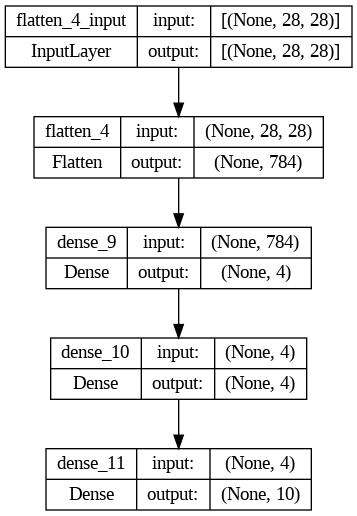

In [58]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs with layer
plot_model(model, show_shapes = True)

# Exercises

## Example Model

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential = ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.fit(
    x_train,
    y_train,
    epochs = 100,
    validation_data = (x_test, y_test)
)

## Binary Classification

### Import

In [21]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Import blobs
x, y = make_moons()
x.shape, y.shape

((100, 2), (100,))

In [22]:
x[:1], y[:1]

(array([[0.92691676, 0.375267  ]]), array([0]))

In [27]:
# To dataframe
circles = pd.DataFrame({'X0':x[:,0], 'X1':x[:,1], 'y':y})
circles

,X0,X1,y
0,0.926917,0.375267,0
1,0.284528,0.958668,0
2,0.991790,0.127877,0
3,-0.991790,0.127877,0
4,0.462538,0.886599,0
...,...,...,...
95,0.715472,-0.458668,1
96,1.159600,-0.487182,1
97,0.900969,0.433884,0
98,1.926917,0.124733,1


### Visualize

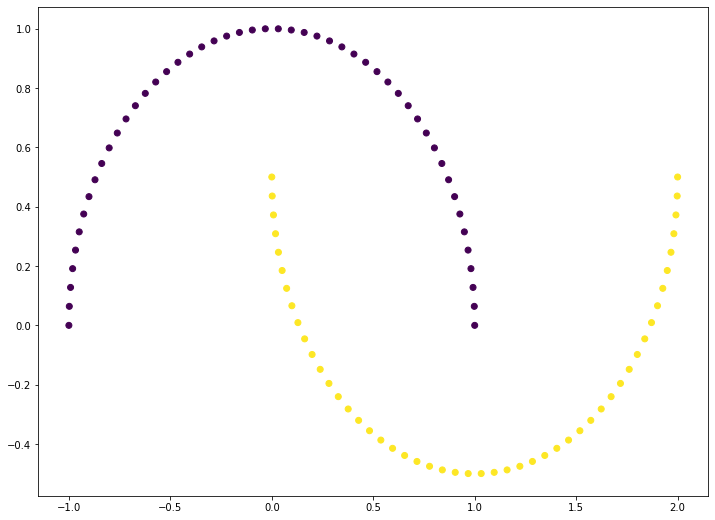

In [42]:
# Visualize dataset

plt.figure(figsize = (12,9))
plt.scatter(x = circles['X0'], y = circles['X1'], c = y)

### Train test split

In [12]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(x, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 2), (25, 2), (75,), (25,))

### Normalize

In [37]:
# Normalize

from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X_train)

X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

X_train_norm[:1], X_test_norm[:1]

(array([[0.90096887, 0.43388374]]), array([[0.8380881, 0.5455349]]))

#### Visualize norm

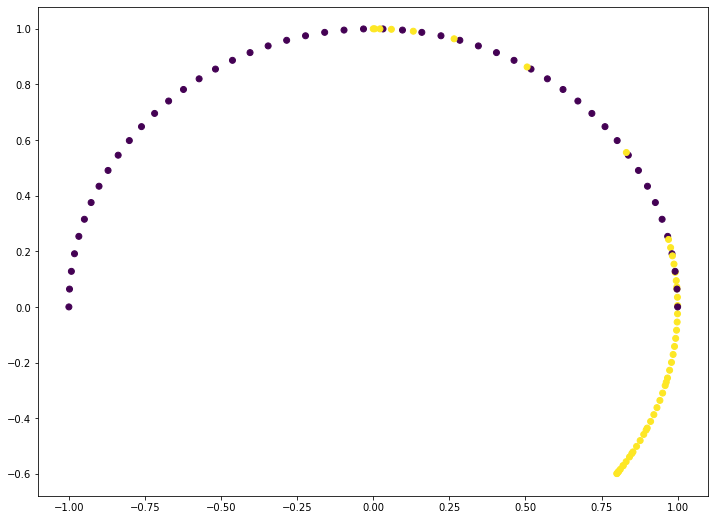

In [49]:
# Visualize norm data

circles_norm_train = pd.DataFrame({'X0':X_train_norm[:,0], 'X1':X_train_norm[:,1],'y':y_train})
circles_norm_test = pd.DataFrame({'X0':X_test_norm[:,0], 'X1': X_test_norm[:,1], 'y':y_test})

plt.figure(figsize = (12,9))
plt.scatter(x = circles_norm_train['X0'], y = circles_norm_train['X1'], c = y_train)
plt.scatter(x = circles_norm_test['X0'], y = circles_norm_test['X1'], c = y_test)

Because normalized data seems to be way more difficult to classify I will stick to not normalized data

### Model

In [57]:
# built model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.fit(
    X_train,
    y_train,
    epochs = 300,
    validation_data = (X_test, y_test)
)

Epoch 1/300
3/3 [==============================] - 2s 302ms/step - loss: 0.7036 - accuracy: 0.4933 - val_loss: 0.6915 - val_accuracy: 0.5200
Epoch 2/300
3/3 [==============================] - 0s 51ms/step - loss: 0.6981 - accuracy: 0.4933 - val_loss: 0.6870 - val_accuracy: 0.5600
Epoch 3/300
3/3 [==============================] - 0s 55ms/step - loss: 0.6927 - accuracy: 0.5600 - val_loss: 0.6825 - val_accuracy: 0.7200
Epoch 4/300
3/3 [==============================] - 0s 58ms/step - loss: 0.6875 - accuracy: 0.6267 - val_loss: 0.6782 - val_accuracy: 0.6800
Epoch 5/300
3/3 [==============================] - 0s 64ms/step - loss: 0.6816 - accuracy: 0.6933 - val_loss: 0.6739 - val_accuracy: 0.6800
Epoch 6/300
3/3 [==============================] - 0s 95ms/step - loss: 0.6755 - accuracy: 0.7467 - val_loss: 0.6685 - val_accuracy: 0.8000
Epoch 7/300
3/3 [==============================] - 0s 72ms/step - loss: 0.6690 - accuracy: 0.7600 - val_loss: 0.6627 - val_accuracy: 0.8400
Epoch 8/300
3/3 [==

### Plot history

<Axes: >

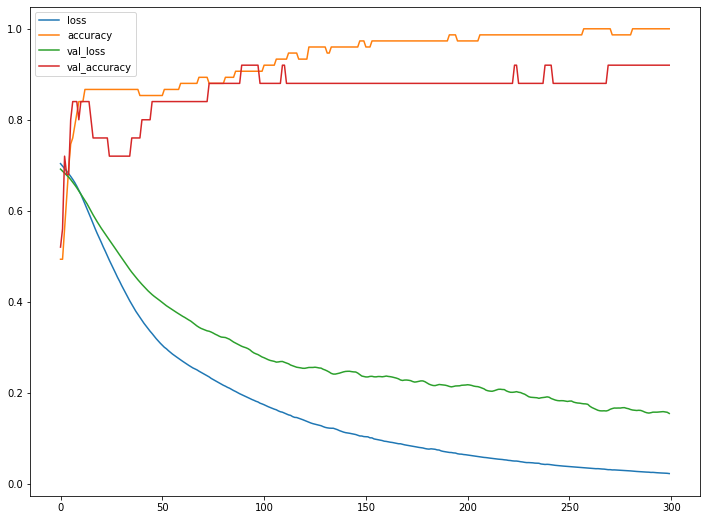

In [59]:
# Visualize training

pd.DataFrame(model.history.history).plot(figsize = (12, 9))

### Evaluate

In [60]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 89ms/step - loss: 0.1543 - accuracy: 0.9200


[0.15431442856788635, 0.9200000166893005]

## Multiclass classification

### Import

In [65]:
# import data

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Normalize

In [68]:
# normalize data

X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_train.max()

In [85]:
tf.unique(y_train)

Unique(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)>, idx=<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([0, 1, 1, ..., 2, 1, 5], dtype=int32)>)

### Best lr

In [94]:
# best learning rate

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.fit(
    X_train_norm,
    y_train,
    epochs = 40,
    validation_data = (X_test_norm, y_test),
    callbacks = [lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2576 - accuracy: 0.5323 - val_loss: 0.8256 - val_accuracy: 0.7032 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7361 - accuracy: 0.7336 - val_loss: 0.7235 - val_accuracy: 0.7385 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6799 - accuracy: 0.7532 - val_loss: 0.6963 - val_accuracy: 0.7492 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6583 - accuracy: 0.7611 - val_loss: 0.6842 - val_accuracy: 0.7563 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7663 - val_loss: 0.6761 - val_accuracy: 0.7573 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6187 - accuracy: 0.7739 - val_loss: 0.6356 - val_accuracy: 0.7690 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

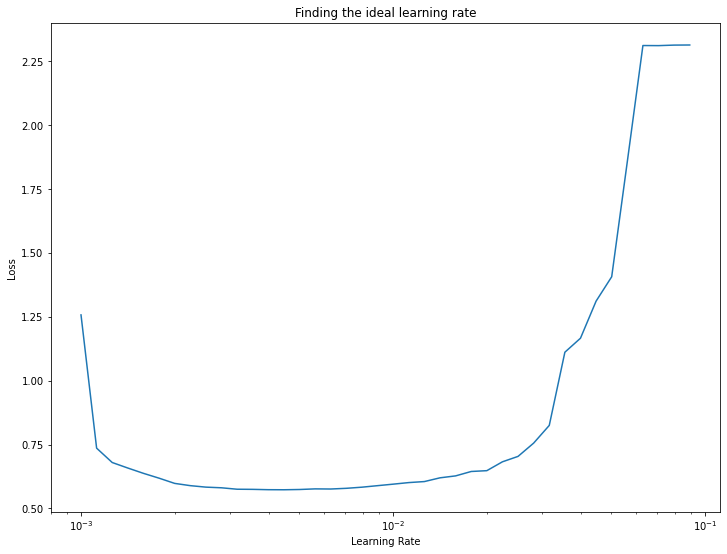

In [97]:
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.figure(figsize = (12,9))
plt.semilogx(lrs, model.history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

Best lr is about 0.001

### Model

In [112]:

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

model.fit(
    X_train_norm,
    y_train,
    epochs = 10,
    validation_data = (X_test_norm, y_test),
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4986 - accuracy: 0.8193 - val_loss: 0.4230 - val_accuracy: 0.8476
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3697 - accuracy: 0.8638 - val_loss: 0.4479 - val_accuracy: 0.8393
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3348 - accuracy: 0.8771 - val_loss: 0.3845 - val_accuracy: 0.8629
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3105 - accuracy: 0.8844 - val_loss: 0.3536 - val_accuracy: 0.8731
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2964 - accuracy: 0.8899 - val_loss: 0.3500 - val_accuracy: 0.8784
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2824 - accuracy: 0.8941 - val_loss: 0.3561 - val_accuracy: 0.8752
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2689 - accuracy: 0.8989 - val_loss: 0.3541 - val_accuracy:

### Plot history

<Axes: >

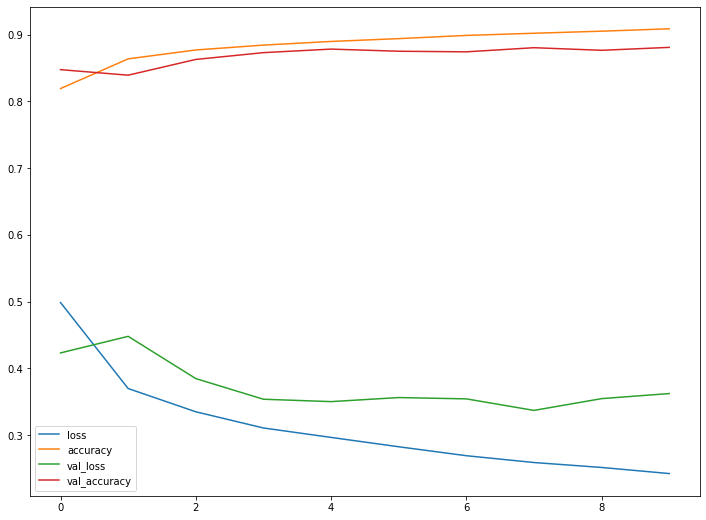

In [113]:
# Plot history

pd.DataFrame(model.history.history).plot(figsize = (12,9))

### Prediction

In [114]:
# Prediction

y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis = 1)
y_pred

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

### Evaluation

##### Plot Confusion Matrix

In [229]:
# Evaluation - Confusion Matrix

def pretty_confusion_matrix(y_pred, y_true, figsize, class_names, text_size):

  import itertools
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix

  figsize = figsize

  cm = confusion_matrix(y_pred = tf.round(y_pred), y_true = y_true)

  cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # prettifying
  fig, ax = plt.subplots(figsize = figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # create a classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = class_names,
        yticklabels = class_names)

  # set x-axis to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # set thresholds for different colors
  threshold = (cm.max() + cm.min()) / 2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i,j] > threshold else 'black',
            size = text_size)

In [116]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

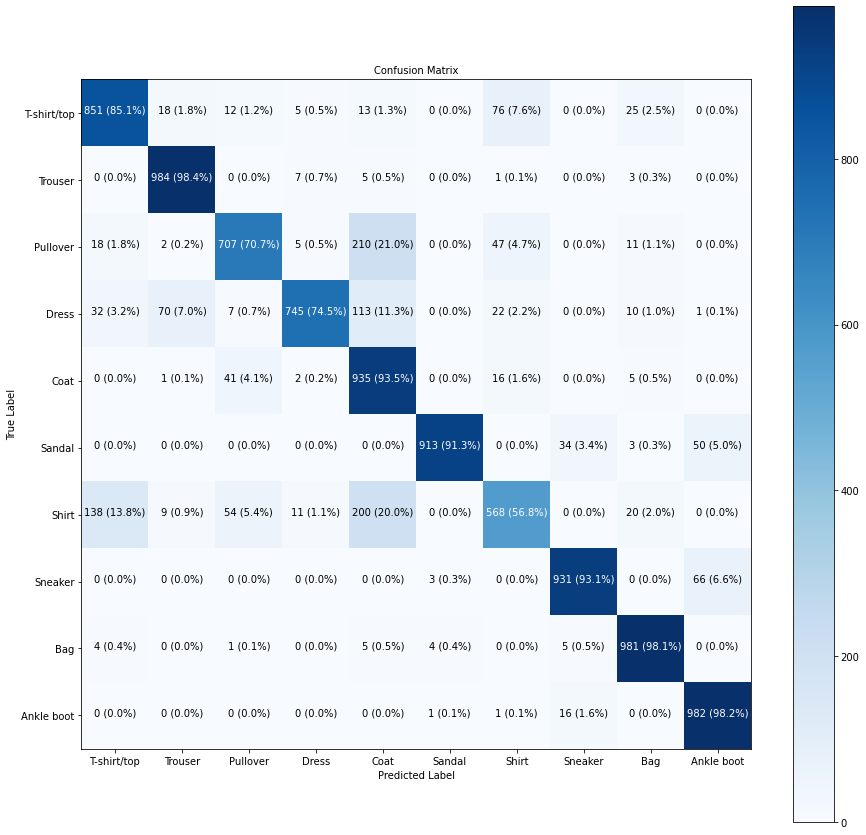

In [121]:
pretty_confusion_matrix(y_pred, y_test, figsize = (15,15), class_names = class_names, text_size = 10)

#### Plot one class

In [123]:
# Evaluation - Random Image Prediction


import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.

  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}%. (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color = color) # set the color to green or red based on if prediction is right on wrong

1/1 [==============================] - 0s 27ms/step


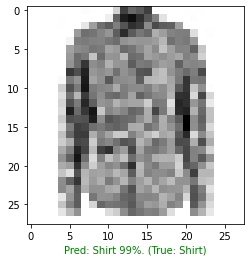

In [159]:
plot_random_image(model = model, images = X_test_norm, true_labels = y_pred, classes = class_names)

#### Plot grid of examples

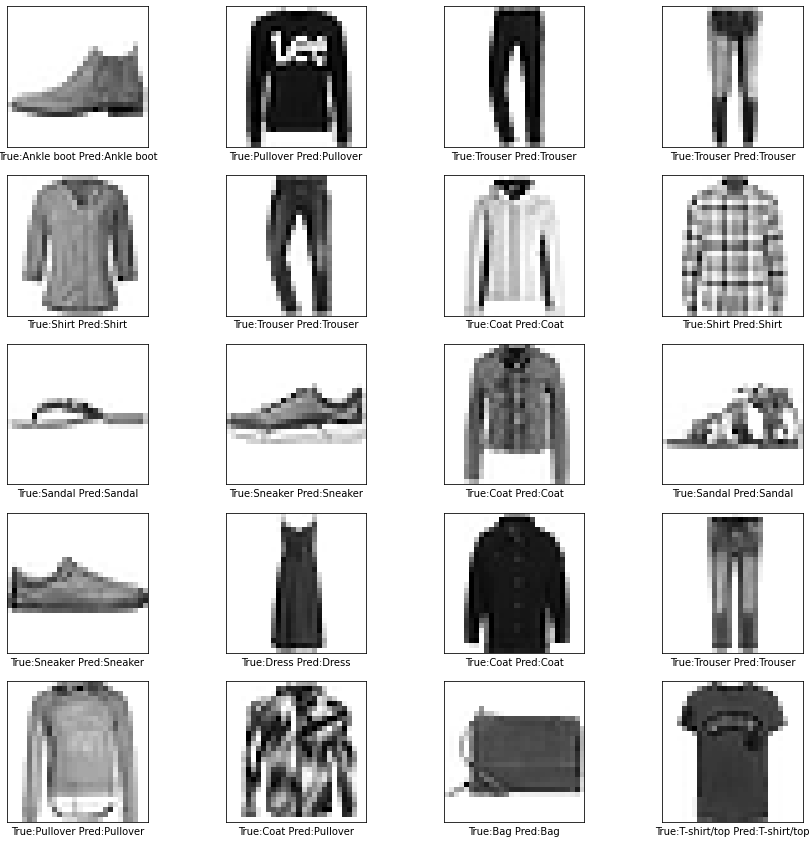

In [202]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_norm[i], cmap=plt.cm.binary)
    plt.xlabel('True:{} Pred:{}'.format(class_names[y_test[i]], class_names[y_pred[i]]))
plt.show()

#### Plot_class function

In [227]:
def plot_class(model, X_test, y_test, class_names, selected_class):
  name = selected_class

  # Select 3 random images
  class_index = class_names.index(name)
  indexes = np.where(y_test == class_index)[0]
  selected_indexes = np.random.choice(indexes, size = 3, replace = False)

  # Create figure
  plt.figure(figsize=(10, 10))

  # Make predictions for selected images
  for i in range(len(selected_indexes)):
      pred = tf.argmax(model.predict(X_test[selected_indexes[i]], verbose = 0), axis=1)



      if class_names[y_test[selected_indexes[i]]] == class_names[int(pred)]:
        color = 'green'
      else:
        color = 'red'

      plt.subplot(1, 3, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(X_test[selected_indexes[i]], cmap=plt.cm.binary)
      plt.xlabel('True:{} Pred:{}'.format(class_names[y_test[selected_indexes[i]]], class_names[int(pred)]), c = color)

  plt.show()

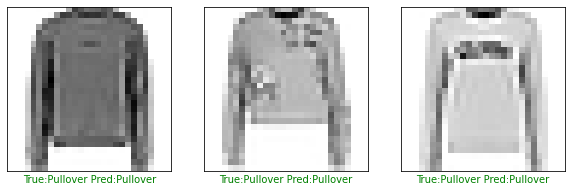

In [228]:
plot_class(model = model, X_test = X_test, y_test = y_test, class_names = class_names, selected_class = 'Pullover')